<a href="https://colab.research.google.com/github/HiroshiATakano/GitHub/blob/master/%E6%95%B0%E7%90%86%E6%9C%80%E9%81%A9%E5%8C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def ensure_and_move_to_folder(folder_name):
  current_dir = os.getcwd()
  target_path = os.path.join(current_dir, folder_name)

  if not os.path.exists(target_path):
    os.makedirs(target_path)
    print(f"Folder '{folder_name}' created successfully.")
  else:
    print(f"Folder '{folder_name}' already exists.")

  #os.chdir(target_path)

In [2]:
import os

folder_name = '数理最適化'
ensure_and_move_to_folder(folder_name)

path = os.getcwd()

try:
    os.chdir('../Python/数理最適化')
except:
    pass

os.getcwd()

Folder '数理最適化' created successfully.


'/content'

In [6]:
!pip install japanize_matplotlib
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 84.1 MB/s eta 0:00:00


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd

import gspread
from google.oauth2.service_account import Credentials

import polars as pl
import numpy as np
import pulp
#from pulp import LpProblem, LpVariable, LpMaximize, LpSum, value

# 認証情報の設定
SERVICE_ACCOUNT_FILE = "my-project-vscode-452201-249bdb033f8c.json"  # JSONファイルのパス
SCOPES = ["https://www.googleapis.com/auth/spreadsheets"]

credentials = Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE, scopes=SCOPES)
client = gspread.authorize(credentials)

# スプレッドシートを開く（URLまたはスプレッドシートIDを使用）
#SPREADSHEET_ID = "1Ma7ehT4TAnkUwJjspP-C3mwJA1hYmbJr8B9GJSFI0lU"  # スプレッドシートのID
SPREADSHEET_ID = "1Ma7ehT4TAnkUwJjspP-C3mwJA1hYmbJr8B9GJSFI0lU"
sheet = client.open_by_key(SPREADSHEET_ID).worksheet("Sheet4") # 最初のシートを取得

# データを取得
list_of_lists = sheet.get_all_records()
df = pd.DataFrame(list_of_lists)
df = df.set_index(df.columns[0])

df


FileNotFoundError: [Errno 2] No such file or directory: 'my-project-vscode-452201-249bdb033f8c.json'

In [ ]:
P = df.columns[:2].to_list()
M = df.index[:2].to_list()
stock = dict(df['Stock'][:2])
gain = dict(df.loc['Venefit'][:2])
require = {(p, m): df.loc[m, p] for p in P for m in M}

x = {}
for p in P:
  x[p] = pulp.LpVariable(p, lowBound=0, cat='Continuous')

In [ ]:
problem = pulp.LpProblem("Maximize_gain", pulp.LpMaximize)

for m in M:
  for p in P:
    problem += pulp.lpSum([require[(p,m)] * x[p] for p in P]) <= stock[m]

problem += pulp.lpSum([gain[p]*x[p] for p in P])

status = problem.solve()
print(pulp.LpStatus[status])

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/takanohiroshi/.pyenv/versions/3.10.5/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/52/k1p3ltss0cx1z00jsbnh_2xr0000gn/T/1a9cb69787d6420bbac5cd042fc7cbc5-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/52/k1p3ltss0cx1z00jsbnh_2xr0000gn/T/1a9cb69787d6420bbac5cd042fc7cbc5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 20 RHS
At line 25 BOUNDS
At line 26 ENDATA
Problem MODEL has 4 rows, 2 columns and 8 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (-2) rows, 2 (0) columns and 4 (-4) elements
0  Obj -0 Dual inf 18.164964 (2)
2  Obj 200
Optimal - objective value 200
After Postsolve, objective 200, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 200 - 2 iterations time 0.002, Presolve 0.00
Option for printingOptions

In [ ]:
for p in P:
  print(p, x[p].value())
print("obj=", problem.objective.value())

X 12.0
Y 4.0
obj= 200.0


In [ ]:
# データ取得
stock_df = pl.read_csv('2.tutorial/stocks.csv')
require_df = pl.read_csv('2.tutorial/requires.csv')
gain_df = pl.read_csv('2.tutorial/gains.csv')

In [ ]:
stock = dict(zip(stock_df["m"], stock_df["stock"]))
require = dict(zip(zip(require_df["p"],require_df["m"]), require_df["require"]))
gain = dict(zip(gain_df["p"], gain_df['gain']))

In [ ]:
P = gain_df['p'].to_list()
M = stock_df['m'].to_list()

In [ ]:
#　線形計画問題の定義
problem = pulp.LpProblem('LP', pulp.LpMaximize)

# 変数の定義 整数計算問題は安定して解くことは期待できない
x = pulp.LpVariable.dicts("x", P, lowBound=0, cat='Continuous')

# 生産量は在庫の範囲で行うという制約
for m in M:
    problem += pulp.lpSum(require[p, m] * x[p] for p in P) <= stock[m]

# 目的関数の定義
problem += pulp.lpSum([gain[p]*x[p] for p in P])


In [ ]:
status = problem.solve()
print('status', pulp.LpStatus[status])

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/takanohiroshi/.pyenv/versions/3.10.5/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/52/k1p3ltss0cx1z00jsbnh_2xr0000gn/T/0e23a61f1f984c2587e4c17671345f42-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/52/k1p3ltss0cx1z00jsbnh_2xr0000gn/T/0e23a61f1f984c2587e4c17671345f42-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 22 RHS
At line 26 BOUNDS
At line 27 ENDATA
Problem MODEL has 3 rows, 4 columns and 9 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 3 (0) rows, 4 (0) columns and 9 (0) elements
0  Obj -0 Dual inf 17.5 (4)
0  Obj -0 Dual inf 17.5 (4)
4  Obj 80.428571
Optimal - objective value 80.428571
Optimal objective 80.42857143 - 4 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU secon

In [ ]:
for p in P:
  print(p, x[p].value())

print('obj=', problem.objective.value())

p1 12.142857
p2 3.5714286
p3 7.4285714
p4 0.0
obj= 80.42857099999999


# 割引クーポンキャンペーンの効果最大化

In [ ]:
import pandas as pd
import polars as pu
import seaborn as sns
import matplotlib.pyplot as plt

cust_df = pl.read_csv('4.coupon/customers.csv')
prob_df = pl.read_csv('4.coupon/visit_probability.csv')

In [ ]:
print(prob_df.glimpse())

Rows: 16
Columns: 6
$ age_cat    <str> age~19, age~19, age~19, age~19, age20~34, age20~34, age20~34, age20~34, age35~49, age35~49
$ freq_cat   <str> freq0, freq1, freq2, freq3~, freq0, freq1, freq2, freq3~, freq0, freq1
$ segment_id <i64> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10
$ prob_dm1   <f64> 0.07, 0.21, 0.28, 0.35, 0.11, 0.32, 0.42, 0.52, 0.08, 0.25
$ prob_dm2   <f64> 0.12, 0.3, 0.39, 0.45, 0.17, 0.43, 0.55, 0.63, 0.14, 0.35
$ prob_dm3   <f64> 0.29, 0.58, 0.74, 0.77, 0.37, 0.72, 0.93, 0.94, 0.33, 0.67



<AxesSubplot:ylabel='Count'>

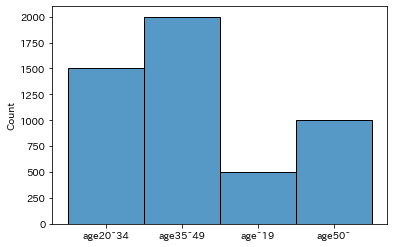

In [ ]:
sns.histplot(cust_df['age_cat'].to_list(), bins=5)

#

<AxesSubplot:ylabel='Count'>

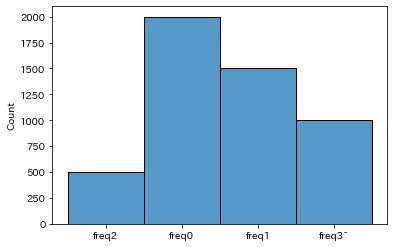

In [ ]:
sns.histplot(cust_df['freq_cat'].to_list(),bins=5)

In [ ]:
pivot_table_df = cust_df.pivot(
    values="customer_id",
    index="age_cat",
    columns="freq_cat",
    aggregate_fn="count"  #
)

pivot_table_df = pivot_table_df.sort("age_cat")

age_order = ["age~19", "age20~34","age35~49","age50~"]
order_map = {v: i for i, v in enumerate(age_order)}

pivot_table_df = pivot_table_df.with_columns(pl.col("age_cat").apply(lambda x : order_map.get(x,-1)).alias("sort_order"))
pivot_table_df = pivot_table_df.sort("sort_order").drop("sort_order")

sorted_table = sorted(pivot_table_df.columns)
pivot_table_df = pivot_table_df[sorted_table]

df_pandas = pivot_table_df.to_pandas().set_index('age_cat')
df_pandas

,freq0,freq1,freq2,freq3~
age_cat,,,,
age~19,200,150,50,100
age20~34,600,450,150,300
age35~49,800,600,200,400
age50~,400,300,100,200


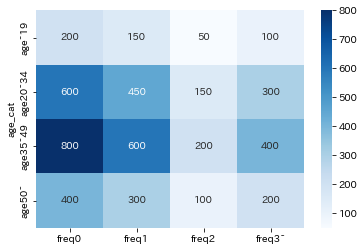

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Heatmapの描画
sns.heatmap(df_pandas, annot=True, fmt='d', cmap='Blues')

plt.show()


In [ ]:
df_pandas2 = prob_df.to_pandas()
df_pandas2

,age_cat,freq_cat,segment_id,prob_dm1,prob_dm2,prob_dm3
0,age~19,freq0,1,0.07,0.12,0.29
1,age~19,freq1,2,0.21,0.30,0.58
2,age~19,freq2,3,0.28,0.39,0.74
3,age~19,freq3~,4,0.35,0.45,0.77
4,age20~34,freq0,5,0.11,0.17,0.37
5,age20~34,freq1,6,0.32,0.43,0.72
6,age20~34,freq2,7,0.42,0.55,0.93
7,age20~34,freq3~,8,0.52,0.63,0.94
8,age35~49,freq0,9,0.08,0.14,0.33
9,age35~49,freq1,10,0.25,0.35,0.67


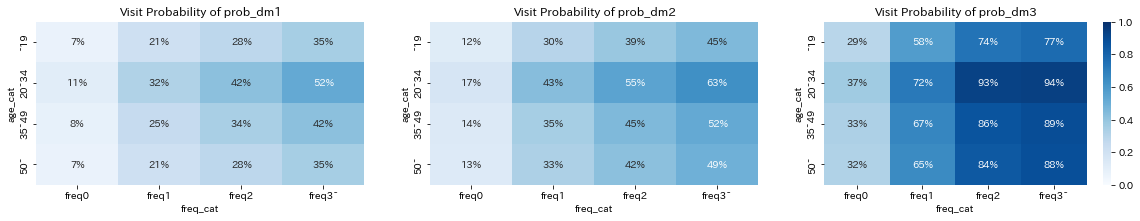

In [ ]:
cols = ['age~19','age20~34','age35~49','age50~']
ax = {}
fig, (ax[0],ax[1],ax[2]) = plt.subplots(1,3, figsize=(20,3))
for i, ptn in enumerate(['prob_dm1', 'prob_dm2','prob_dm3']):
    prob_pivot_df = pd.pivot_table(data=df_pandas2, values=ptn, columns='freq_cat', index='age_cat')
    prob_pivot_df = prob_pivot_df.reindex(cols)
    prob_pivot_df = prob_pivot_df.rename(index=lambda x: x.replace("age",""))
    if i == 2:
        sns.heatmap(prob_pivot_df, vmin=0, vmax=1, annot=True, fmt='.0%', cmap='Blues',ax=ax[i])
    else:
        sns.heatmap(prob_pivot_df, vmin=0, vmax=1, annot=True, fmt='.0%', cmap='Blues',ax=ax[i], cbar=False)
    ax[i].set_title(f'Visit Probability of {ptn}')


* 同じセグメントでは、クーポンの金額が大きいパターンの順に来店率が高くなる。
* 同じ年齢区分では、昨年度の来店回数が多いほどれ来店率が高くなる。
* 同じ昨年度来店回数区分では、age20~34の来店率が高くage~19の来店率が低い。


1. 各会員に対してどのパターンのダイレクトメールを送付するかを決定
2. 各会員に対して送付するダイレクトメールはいずれか１パターン
3. クーポン付与による来客増加数を最大化する
4. 怪異の予算消費期待値の合計は100万円以下
5. 各パターンのダイレクトメールをそれぞれのセグメントに属する会員の10%以下に送付

## モデリング１：会員別送付モデル


In [ ]:
import pulp

problem = pulp.LpProblem(name='DiscountCouponProblem1', sense=pulp.LpMaximize)

In [ ]:
"https://github.com/HiroshiATakano/GitHub"
"/Users/takanohiroshi/Library/CloudStorage/OneDrive-YokohamaInternationalExchangeAssociation/Python/GitHub"

'/Users/takanohiroshi/Library/CloudStorage/OneDrive-YokohamaInternationalExchangeAssociation/Python/GitHub'